In [2]:
#!/usr/bin/env python3
import os
import re
import sys
import collections
import argparse
import tables
import itertools
import matplotlib
import glob
import math
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import gseapy as gp
import pandas as pd
import scipy.stats as stats
import scipy.sparse as sp_sparse

from multiprocessing import Pool
from collections import defaultdict
from scipy import sparse, io
from scipy.sparse import csr_matrix
from multiprocessing import Pool
from matplotlib_venn import venn2, venn2_circles
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [4]:
gp.__version__

'0.9.9'

### Loading Data

In [5]:
#load data, specify the column names
columns = [
    'NAME','PZ800','PZ801','PZ802','PZ803',
    'PZ804','PZ805','PZ806','PZ807','PZ808',
    'PZ809','PZ810','PZ811','PZ812','PZ813',
    'PZ814','PZ815','PZ816','PZ817','PZ818',
    'PZ819','PZ820','PZ821','PZ822','PZ823'
]

data = pd.read_csv('./FeatureCounts_MYB_raw.txt', sep = '\t', header = None)
data.columns = columns

In [6]:
des_col = ['na'] * 56833
data.insert(loc=1, column='DESCRIPTION', value=des_col)

gene_index = (np.sum(data[data.columns[data.columns.str.startswith('PZ')]], axis=1) > 100).values

In [7]:
#matrix normalization
data_matrix = data[data.columns[data.columns.str.startswith('PZ')]]
sample_sum = np.sum(data_matrix, axis=0).values
normalized_mtx = data_matrix.divide(sample_sum) * 1e6

In [8]:
data.iloc[:,2:] = normalized_mtx
data_filtered = data.iloc[gene_index,:]

### Run GSEA

In [9]:
gs_res = gp.gsea(data=data_filtered, # or data='./P53_resampling_data.txt'
                 gene_sets='./Genesets/IVANOVA_HEMATOPOIESIS_MATURE_CELL_geneset.gmt', # enrichr library names
                 cls= './Phenotype_MYB.cls', # cls=class_vector
                 #set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=1000, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='signal_to_noise',
                 processes=4)

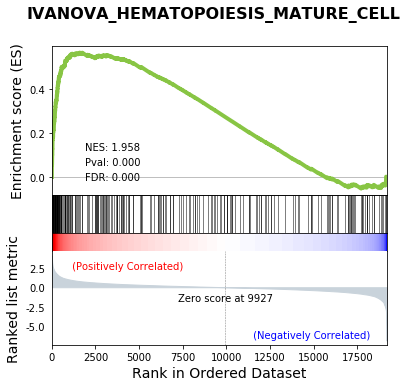

In [10]:
from gseapy.plot import gseaplot, heatmap
terms = gs_res.res2d.index
fig = gseaplot(
    gs_res.ranking, 
    term=terms[0], 
    **gs_res.results[terms[0]],
#    ofname='./IVANOVA-GSEA.pdf'
)

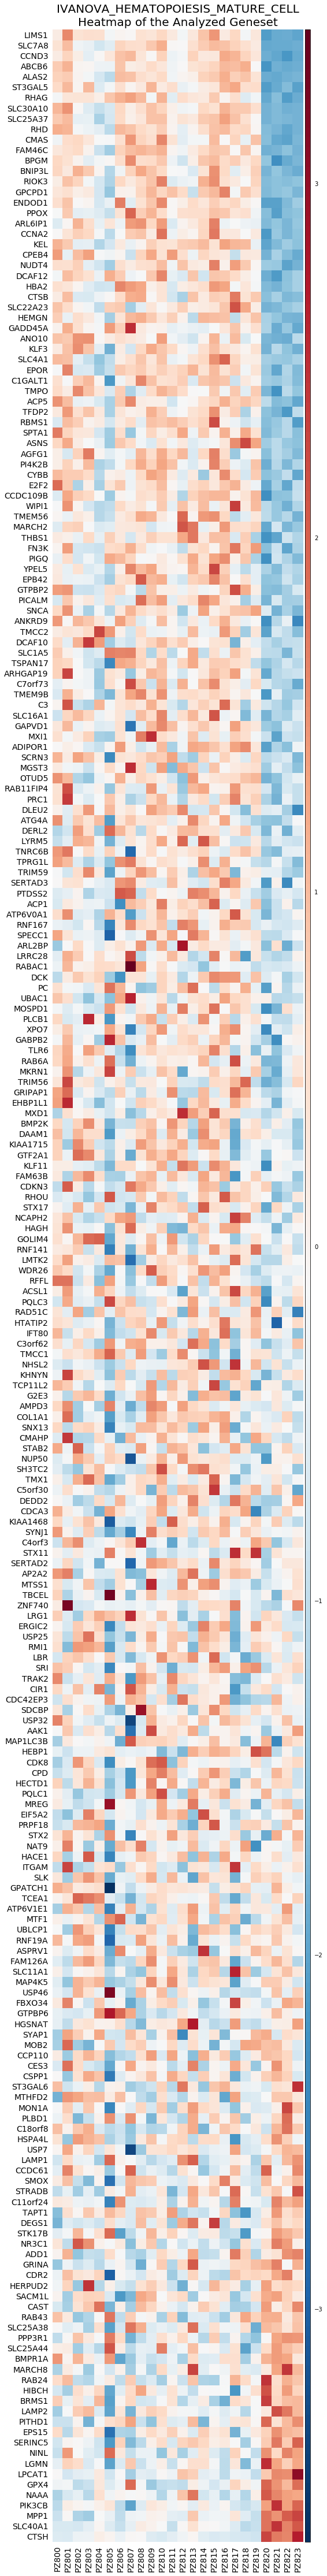

In [11]:
# plotting heatmap
genes = gs_res.res2d.genes[0].split(";")
heatmap(
    df = gs_res.heatmat.loc[genes], 
    z_score=0, 
    title=terms[0], 
    figsize=(8,80), 
#    ofname='IVANOVA-heatmap.pdf'
)

In [10]:
gs_res.res2d

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
HALLMARK_HEME_METABOLISM,0.77422,1.935062,0.0,0.0,200,188,CCND3;OSBP2;GYPB;SLC2A1;ABCB6;ALAS2;GYPC;GYPA;...,CCND3;OSBP2;GYPB;SLC2A1;ABCB6;ALAS2;GYPC;GYPA;...
